In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\RDSC-07-30-Update\RDSC-07-30-Update\Docs_needed\covid-19-testing-all-observations.csv")

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Hp\AppData\Local\Temp\ipykernel_25516\209509492.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\RDSC-07-30-Update\RDSC-07-30-Update\Docs_needed\covid-19-testing-all-observations.csv")


In [4]:
df.head()

,Unnamed: 0,entity,iso_code,date,source_url,source_label,notes,daily_change_in_cumulative_total,cumulative_total,cumulative_total_per_thousand,daily_change_in_cumulative_total_per_thousand,7_day_smoothed_daily_change,7_day_smoothed_daily_change_per_thousand
0,0,Argentina - people tested,ARG,2020-02-11,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,2.0,2.0,0.0,0.0,NaN,NaN
1,1,Argentina - people tested,ARG,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Argentina - people tested,ARG,2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Argentina - people tested,ARG,2020-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Argentina - people tested,ARG,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Step 1: Clean and transform Dataset 1 (covid-19-testing-all-observations.csv)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [8]:
# Create new time-based columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month   
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week']= df['date'].dt.day_name()

In [10]:
# Remove rows with completely missing test numbers
df_cleaned = df.dropna(subset=['cumulative_total', 'daily_change_in_cumulative_total'])
df_cleaned.head()

,Unnamed: 0,entity,iso_code,date,source_url,source_label,notes,daily_change_in_cumulative_total,cumulative_total,cumulative_total_per_thousand,daily_change_in_cumulative_total_per_thousand,7_day_smoothed_daily_change,7_day_smoothed_daily_change_per_thousand,year,month,week,day_of_week
0,0,Argentina - people tested,ARG,2020-02-11,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,2.0,2.0,0.0,0.0,NaN,NaN,2020,2,7,Tuesday
9,9,Argentina - people tested,ARG,2020-02-20,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,2.0,4.0,0.0,0.0,0.0,0.0,2020,2,8,Thursday
14,14,Argentina - people tested,ARG,2020-02-25,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,1.0,5.0,0.0,0.0,0.0,0.0,2020,2,9,Tuesday
16,16,Argentina - people tested,ARG,2020-02-27,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,5.0,10.0,0.0,0.0,1.0,0.0,2020,2,9,Thursday
17,17,Argentina - people tested,ARG,2020-02-28,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,9.0,19.0,0.0,0.0,2.0,0.0,2020,2,9,Friday


In [12]:
export_path = "D:\covid_testing_cleaned.csv"
df_cleaned.to_csv(export_path, index=False)

export_path
df = pd.read_csv(export_path)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Hp\AppData\Local\Temp\ipykernel_25516\951934512.py:1: SyntaxWarning: invalid escape sequence '\c'
  export_path = "D:\covid_testing_cleaned.csv"


In [14]:
# Top 10 countries by total tests
df['country'] = df['entity'].str.extract(r'^(.*?)(?:\s-\s.*)?$')
latest_totals = df.sort_values("date").groupby("country").tail(1)
top10_total_tests = latest_totals.sort_values("cumulative_total", ascending=False).head(10)


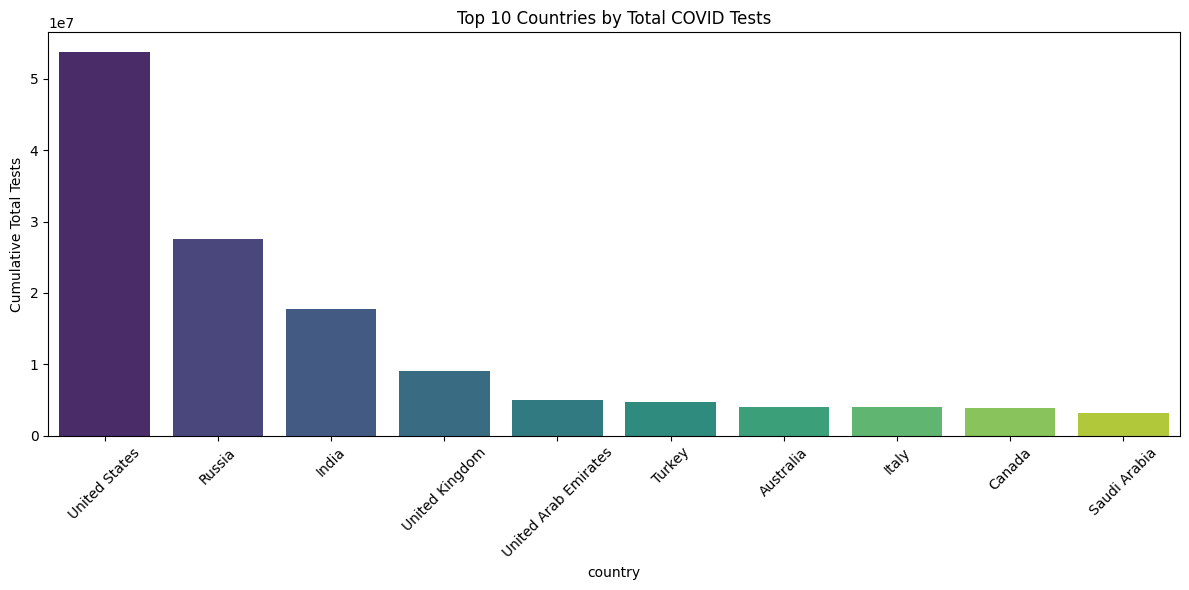

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_total_tests, x='country', y='cumulative_total', palette='viridis')
plt.title("Top 10 Countries by Total COVID Tests")
plt.ylabel("Cumulative Total Tests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Countries with steepest weekly increase (maximum week-on-week jump in testing)
weekly_data = df.groupby(['country', 'year', 'week'])['daily_change_in_cumulative_total'].sum().reset_index()
weekly_data['weekly_total'] = weekly_data.groupby('country')['daily_change_in_cumulative_total'].transform('sum')


In [19]:
# Calculate weekly difference
weekly_data['weekly_diff'] = weekly_data.groupby('country')['daily_change_in_cumulative_total'].diff()


In [20]:
# Get top countries with maximum week-on-week increase
steepest_weekly = weekly_data.sort_values('weekly_diff', ascending=False).dropna().head(10)


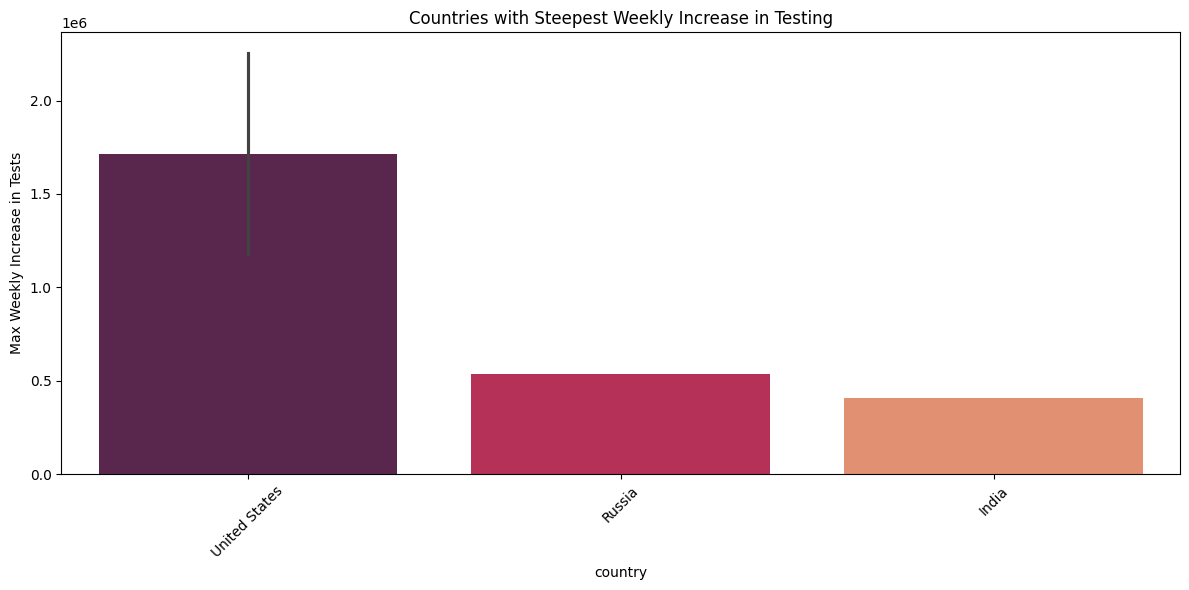

In [ ]:
##Countries with steepest weekly increase
plt.figure(figsize=(12, 6))
sns.barplot(data=steepest_weekly, x='country', y='weekly_diff', palette='rocket')
plt.title("Countries with Steepest Weekly Increase in Testing")
plt.ylabel("Max Weekly Increase in Tests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Monthly trend per region (Note: region data is missing; grouping by country for now)
monthly_trend = df.groupby(['country', 'year', 'month'])['daily_change_in_cumulative_total'].sum().reset_index()


In [23]:
top5_countries = top10_total_tests['country'].head(5).tolist()
top5_monthly = monthly_trend[monthly_trend['country'].isin(top5_countries)]

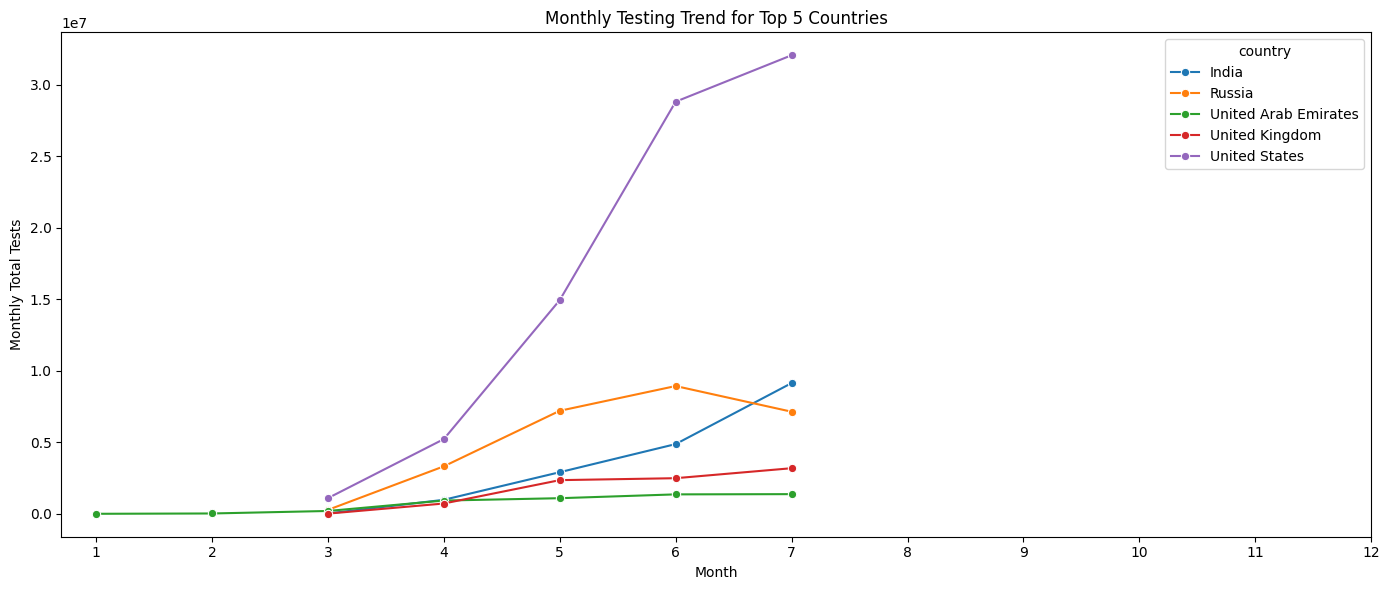

In [24]:
# Plot trend for top 5 countries by test count
plt.figure(figsize=(14, 6))
sns.lineplot(data=top5_monthly, x='month', y='daily_change_in_cumulative_total', hue='country', palette='tab10', marker='o')
plt.title("Monthly Testing Trend for Top 5 Countries")
plt.ylabel("Monthly Total Tests")
plt.xlabel("Month")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [ ]:
# Weekly smoothed trend of top 5 countries (7-day smoothed)
smoothed_df = df[df['country'].isin(top5_countries)]
weekly_smoothed = smoothed_df.groupby(['country', 'year', 'week'])['7_day_smoothed_daily_change'].mean().reset_index()

In [26]:
# Plot with Plotly
import plotly.express as px
fig = px.line(
    weekly_smoothed,
    x='week',
    y='7_day_smoothed_daily_change',
    color='country',
    title='Weekly Smoothed Trend of Top 5 Countries',
    markers=True
)
fig.update_layout(xaxis_title="Week", yaxis_title="7-Day Smoothed Daily Tests")
fig.show()

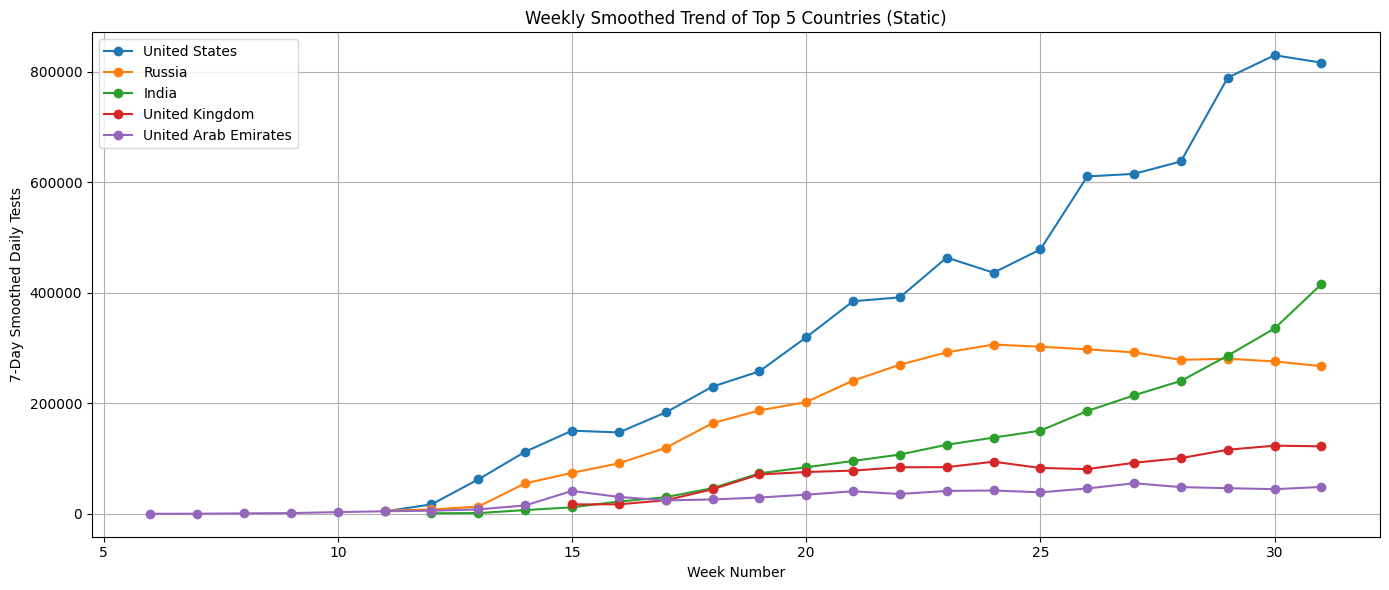

In [27]:
##weekly smoothed trend of top 5 countries using Matplotlib (static chart)

plt.figure(figsize=(14, 6))
for country in top5_countries:
    country_data = weekly_smoothed[weekly_smoothed['country'] == country]
    plt.plot(
        country_data['week'],
        country_data['7_day_smoothed_daily_change'],
        marker='o',
        label=country
    )

plt.title("Weekly Smoothed Trend of Top 5 Countries (Static)")
plt.xlabel("Week Number")
plt.ylabel("7-Day Smoothed Daily Tests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()